In [1]:
!pip install pandas scikit-learn matplotlib seaborn numpy

     ---------------------------------------- 0.0/61.0 kB ? eta -:--:--
     -------------------- ------------------- 30.7/61.0 kB 1.4 MB/s eta 0:00:01
     -------------------------------------- 61.0/61.0 kB 819.4 kB/s eta 0:00:00
     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ---------------------------------------- 60.4/60.4 kB 3.1 MB/s eta 0:00:00
     ---------------------------------------- 0.0/162.6 kB ? eta -:--:--
     ----------------------------------- -- 153.6/162.6 kB 3.1 MB/s eta 0:00:01
     -------------------------------------- 162.6/162.6 kB 1.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
    --------------------------------------- 0.2/11.6 MB 4.5 MB/s eta 0:00:03
   - -------------------------------------- 0.4/11.6 MB 6.3 MB/s eta 0:00:02
   -- ------------------------------------- 0.6/11.6 MB 3.7 MB/s eta 0:00:04
   --- ------------------------------------ 1.1/11.6 MB 5.6 MB/s eta 0:00:02
   --

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df=pd.read_csv('flight.csv')
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
df.drop(['Unnamed: 0','flight','duration'],axis=1,inplace=True)

In [5]:
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,1,5955


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   airline           300153 non-null  object
 1   source_city       300153 non-null  object
 2   departure_time    300153 non-null  object
 3   stops             300153 non-null  object
 4   arrival_time      300153 non-null  object
 5   destination_city  300153 non-null  object
 6   class             300153 non-null  object
 7   days_left         300153 non-null  int64 
 8   price             300153 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 20.6+ MB


<Axes: xlabel='airline'>

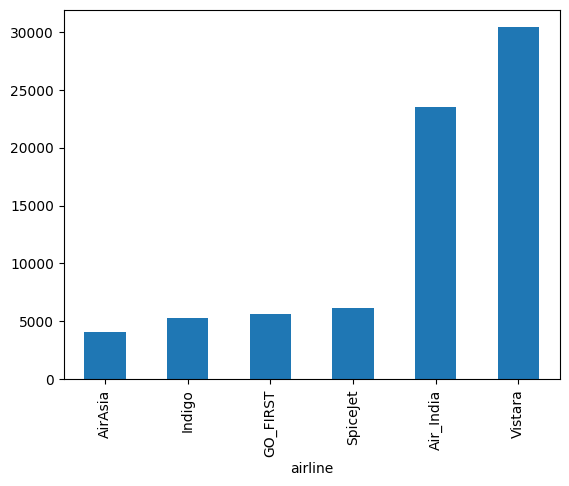

In [8]:
df.groupby(['airline'])['price'].mean().sort_values().plot(kind='bar')

<Axes: xlabel='airline'>

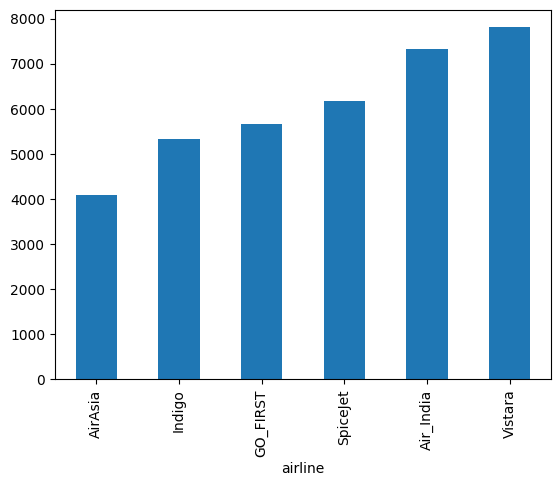

In [13]:
#Airline vs price
df[df['class']=='Economy'].groupby(['airline'])['price'].mean().sort_values().plot(kind='bar')

In [14]:
#Encode Airline

df['airline']=df['airline'].map({'AirAsia':0,'Indigo':1,'GO_FIRST':2,'SpiceJet':3,'Air_India':4 ,'Vistara':5})
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,days_left,price
0,3,Delhi,3,0,4,3,Economy,1,5953
1,3,Delhi,0,0,1,3,Economy,1,5953
2,0,Delhi,0,0,0,3,Economy,1,5956
3,5,Delhi,1,0,2,3,Economy,1,5955
4,5,Delhi,1,0,1,3,Economy,1,5955


<Axes: xlabel='source_city'>

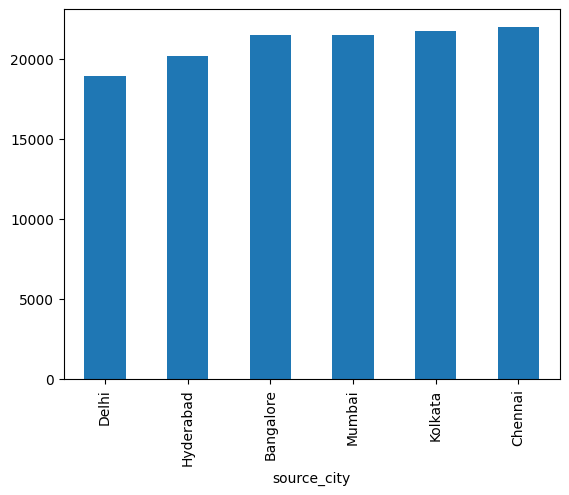

In [15]:
#Source_city vs price
df.groupby(['source_city'])['price'].mean().sort_values().plot(kind='bar')

In [16]:
#Encode Source_city
df['source_city']=df['source_city'].map({'Delhi':0,'Hyderabad':1,'Bangalore':2,'Mumbai':3,'Kolkata':4,'Chennai':5})
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,days_left,price
0,3,0,3,0,4,3,Economy,1,5953
1,3,0,0,0,1,3,Economy,1,5953
2,0,0,0,0,0,3,Economy,1,5956
3,5,0,1,0,2,3,Economy,1,5955
4,5,0,1,0,1,3,Economy,1,5955


<Axes: xlabel='destination_city'>

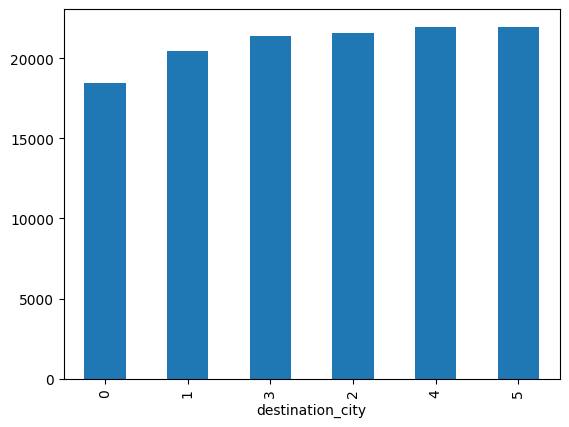

In [17]:
#Destination_city vs price
df.groupby(['destination_city'])['price'].mean().sort_values().plot(kind='bar')

In [18]:
#Encode Destination_city
df['destination_city']=df['destination_city'].map({'Delhi':0,'Hyderabad':1,'Bangalore':2,'Mumbai':3,'Chennai':4,'Kolkata':5})
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,days_left,price
0,3,0,3,0,4,NaN,Economy,1,5953
1,3,0,0,0,1,NaN,Economy,1,5953
2,0,0,0,0,0,NaN,Economy,1,5956
3,5,0,1,0,2,NaN,Economy,1,5955
4,5,0,1,0,1,NaN,Economy,1,5955


In [20]:
#Encode departure_time and arrival_time
df['departure_time']=df['departure_time'].map({'Early_Morning':0,'Morning':1,'Afternoon':2,'Evening':3,'Night':4,'Late_Night':5})
df['arrival_time']=df['arrival_time'].map({'Early_Morning':0,'Morning':1,'Afternoon':2,'Evening':3,'Night':4,'Late_Night':5})
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,days_left,price
0,3,0,NaN,0,NaN,NaN,Economy,1,5953
1,3,0,NaN,0,NaN,NaN,Economy,1,5953
2,0,0,NaN,0,NaN,NaN,Economy,1,5956
3,5,0,NaN,0,NaN,NaN,Economy,1,5955
4,5,0,NaN,0,NaN,NaN,Economy,1,5955


In [23]:
df['stops'].unique()

array([nan])

In [24]:
#Encode stops
df['stops']=df['stops'].map({'zero':0,'one':1,'two':2,'two_or_more':3})
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,days_left,price
0,3,0,NaN,NaN,NaN,NaN,Economy,1,5953
1,3,0,NaN,NaN,NaN,NaN,Economy,1,5953
2,0,0,NaN,NaN,NaN,NaN,Economy,1,5956
3,5,0,NaN,NaN,NaN,NaN,Economy,1,5955
4,5,0,NaN,NaN,NaN,NaN,Economy,1,5955


In [31]:
#Encode economy
df['class']=df['class'].map({'Economy':0,'Business':1})
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,days_left,price
0,3,0,NaN,NaN,NaN,NaN,NaN,1,5953
1,3,0,NaN,NaN,NaN,NaN,NaN,1,5953
2,0,0,NaN,NaN,NaN,NaN,NaN,1,5956
3,5,0,NaN,NaN,NaN,NaN,NaN,1,5955
4,5,0,NaN,NaN,NaN,NaN,NaN,1,5955


In [30]:
df['days_left'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
      dtype=int64)

In [33]:
#Train Test Split
X=df.drop(['price'],axis=1)
Y=df['price']

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((240122, 8), (60031, 8), (240122,), (60031,))

In [39]:
X_train

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,days_left
259861,4,2,NaN,NaN,NaN,NaN,NaN,22
179199,5,1,NaN,NaN,NaN,NaN,NaN,35
45507,5,3,NaN,NaN,NaN,NaN,NaN,15
22623,2,0,NaN,NaN,NaN,NaN,NaN,16
91847,5,2,NaN,NaN,NaN,NaN,NaN,39
...,...,...,...,...,...,...,...,...
33867,5,0,NaN,NaN,NaN,NaN,NaN,39
84434,5,2,NaN,NaN,NaN,NaN,NaN,3
95816,4,2,NaN,NaN,NaN,NaN,NaN,12
203245,5,5,NaN,NaN,NaN,NaN,NaN,9


In [50]:
#Model Building
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,Y_train)


ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [47]:
score=model.score(X_test,Y_test)
print(score)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [46]:
#mae
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(Y_test,model.predict(X_test))
print(mae)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [44]:
#Save the model
import pickle
pickle.dump(model,open('airflight.pkl','wb'))

